##### Install gensim

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec


In [ ]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural language processing is a fiscinating field."
]

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [ ]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fiscinating', 'field', '.']]

In [ ]:
model = Word2Vec(final_data, min_count = 1, vector_size = 10)
model

In [ ]:
model.wv["bananas"]

array([-0.0853423 ,  0.03205383, -0.0463285 , -0.05092748,  0.03594525,
        0.0537103 ,  0.07767995, -0.05763431,  0.07429413,  0.0662737 ],
      dtype=float32)

In [ ]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        # print(f"Word Embedding for {word} is: {word_embedding}")
        return word_embedding
    except:
        return None

In [ ]:
get_embedding("fox")

array([-0.08157917,  0.04495798, -0.04137076,  0.00824536,  0.08498619,
       -0.04462177,  0.045175  , -0.0678696 , -0.03548489,  0.09398508],
      dtype=float32)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
cosine_similarity(model.wv["fox"].reshape(1, -1),
                  model.wv["dog"].reshape(1, -1))


array([[0.2238495]], dtype=float32)

In [ ]:
cosine_similarity(model.wv["apples"].reshape(1, -1),
                  model.wv["bananas"].reshape(1, -1))

array([[0.18962291]], dtype=float32)

In [ ]:
nltk.download("abc")

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.


True

In [ ]:
from nltk.corpus import abc

In [ ]:
sents = abc.sents()


In [ ]:
len(sents)

29059

In [ ]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [ ]:
model = Word2Vec(sents, min_count = 1, vector_size = 10)

In [ ]:
len(model.wv.key_to_index)

31885

In [ ]:
model.wv.most_similar("company")

[('inquiry', 0.9596413969993591),
 ('group', 0.9506016969680786),
 ('report', 0.9501466155052185),
 ('government', 0.9499489068984985),
 ('Dept', 0.9491718411445618),
 ('Government', 0.9481544494628906),
 ('slabs', 0.9463406801223755),
 ('disband', 0.9386801719665527),
 ('research', 0.9365071654319763),
 ('Court', 0.9358832836151123)]

In [ ]:
model.wv["company"]

array([-0.41179293,  1.4739127 ,  4.727095  , -1.9220545 , -0.06259871,
       -1.5971805 ,  0.9499348 , -0.9511335 , -2.9846625 , -1.2266831 ],
      dtype=float32)

In [ ]:
model.wv["government"]

array([-0.37118992,  0.85463256,  3.1639705 , -0.41923997, -0.31142253,
       -1.3619258 ,  0.19041932,  0.17030264, -1.6745099 , -0.8903872 ],
      dtype=float32)

##### Read the data and train the Word2Vec

In [ ]:
# Data => intents.json
# mitu.co.in/datasets

In [ ]:
import json
with open("intents.json") as file:
    data = json.load(file)

In [ ]:
type(data)

list

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [ ]:
df["patterns"][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [ ]:
df["patterns"].apply(" ".join)

,patterns
0,Hi How are you Is any one to talk? Hello hi ar...
1,Bye See you later Goodbye I will come back soon
2,Thanks for helping me Thank your guidance That...
3,What hours are you open? Tell your opening tim...
4,Can I pay using credit card? Can I pay using ...


In [ ]:
df["patterns"] = df["patterns"].apply(" ".join)

In [ ]:
df

,tag,patterns,responses
0,welcome,Hi How are you Is any one to talk? Hello hi ar...,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,Bye See you later Goodbye I will come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,Thanks for helping me Thank your guidance That...,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,What hours are you open? Tell your opening tim...,"[We're open every day 8am-7pm, Our office hour..."
4,payments,Can I pay using credit card? Can I pay using ...,"[We accept VISA, Mastercard and credit card, W..."


In [ ]:
from nltk.corpus import stopwords

In [53]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import wordpunct_tokenize
from textblob import Word
import string
stop = stopwords.words("english")

In [54]:
df["patterns"] = df["patterns"].apply(
    lambda x: " ".join(x.lower() for x in word_tokenize(x)))
df["patterns"] = df["patterns"].apply(
    lambda x: " ".join(x for x in word_tokenize(x) if x not in string.punctuation))
df["patterns"] = df["patterns"].str.replace("[^\w\s]", "")
df["patterns"] = df["patterns"].apply(
    lambda x : " ".join(x for x in word_tokenize(x) if not x.isdigit()))
df["patterns"] = df["patterns"].apply(
    lambda x: " ".join(x for x in word_tokenize(x) if not x in stop))
df["patterns"] = df["patterns"].apply(
    lambda x: " ".join([Word(word).lemmatize(pos = "v") for word in word_tokenize(x)]))

In [55]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [56]:
bigger_li = []
for i in df["patterns"]:
    bigger_li.append(word_tokenize(i))
bigger_li

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [57]:
model = Word2Vec(bigger_li, min_count = 1, vector_size = 2)

In [58]:
model.wv["hi"]

array([0.32294363, 0.4486494 ], dtype=float32)

In [59]:
model.wv["hello"]

array([-0.22683066,  0.32770258], dtype=float32)

In [61]:
model.wv.key_to_index

{'pay': 0,
 'open': 1,
 'use': 2,
 'hi': 3,
 'time': 4,
 'thank': 5,
 'hello': 6,
 'talk': 7,
 'soon': 8,
 'one': 9,
 'bye': 10,
 'see': 11,
 'later': 12,
 'goodbye': 13,
 'come': 14,
 'back': 15,
 'available': 16,
 'cash': 17,
 'help': 18,
 'mastercard': 19,
 "'s": 20,
 'helpful': 21,
 'kind': 22,
 'hours': 23,
 'tell': 24,
 'please': 25,
 'credit': 26,
 'card': 27,
 'guidance': 28}

In [63]:
import numpy as np
import matplotlib.pyplot as plt


In [64]:
words = list(model.wv.key_to_index.keys())
words

['pay',
 'open',
 'use',
 'hi',
 'time',
 'thank',
 'hello',
 'talk',
 'soon',
 'one',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'available',
 'cash',
 'help',
 'mastercard',
 "'s",
 'helpful',
 'kind',
 'hours',
 'tell',
 'please',
 'credit',
 'card',
 'guidance']

In [66]:
vectors = []
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))
vectors

[[-0.026513906, 0.01156701],
 [0.25526112, 0.45090607],
 [-0.46515337, -0.35582092],
 [0.32294363, 0.4486494],
 [-0.2507714, -0.18816859],
 [0.36877084, -0.07690762],
 [-0.22683066, 0.32770258],
 [-0.24300802, -0.09080088],
 [0.14380899, 0.049651854],
 [-0.41426075, -0.4724409],
 [0.36533156, 0.25365862],
 [0.3375778, 0.038443603],
 [0.31745085, -0.17025824],
 [-0.047435395, 0.28846955],
 [-0.37631938, -0.19679889],
 [-0.37573153, -0.046566635],
 [0.47690594, -0.36595833],
 [-0.11668843, -0.09688705],
 [0.40388986, -0.29662946],
 [0.0021348884, -0.23767537],
 [-0.48039246, 0.25032294],
 [-0.43807694, -0.21959437],
 [-0.0018065537, -0.014891196],
 [-0.38314208, 0.48097077],
 [0.24910289, 0.46165717],
 [-0.40802845, 0.22491622],
 [-0.20685782, 0.041312076],
 [0.4248581, -0.22306798],
 [0.22575632, -0.33917618]]

In [72]:
vf = pd.DataFrame(vectors, columns = ["x", "y"])
vf

,x,y
0,-0.026514,0.011567
1,0.255261,0.450906
2,-0.465153,-0.355821
3,0.322944,0.448649
4,-0.250771,-0.188169
5,0.368771,-0.076908
6,-0.226831,0.327703
7,-0.243008,-0.090801
8,0.143809,0.049652
9,-0.414261,-0.472441


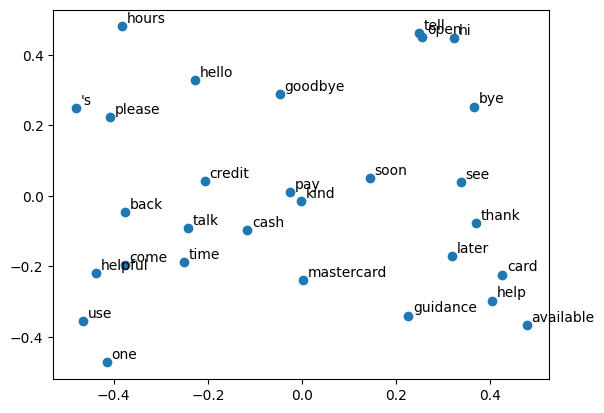

In [81]:
plt.scatter(vf["x"], vf["y"])
for i in range(len(words)):
    plt.annotate(xy = (vf.loc[i, "x"] + 0.01, vf.loc[i, "y"] + 0.01), text = words[i])

In [83]:
cosine_similarity(model.wv["goodbye"].reshape(1, -1),
                  model.wv["cash"].reshape(1, -1))

array([[-0.50550663]], dtype=float32)

In [82]:
cosine_similarity(model.wv["credit"].reshape(1, -1),
                  model.wv["cash"].reshape(1, -1))

array([[0.62935936]], dtype=float32)

In [84]:
cosine_similarity(model.wv["pay"].reshape(1, -1),
                  model.wv["kind"].reshape(1, -1))

array([[-0.28656924]], dtype=float32)

In [86]:
model.wv.most_similar("help", topn = 5)

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135)]

In [85]:
model.wv.doesnt_match(["one", "use", "help", "come", "bye"])

'bye'